## Creating Tables using Parquet

Let us create order_items table using Parquet file format. By default, the files of table using Parquet file format are compressed using Snappy algorithm.

Let us start spark context for this Notebook so that we can execute the code provided. You can sign up for our [10 node state of the art cluster/labs](https://labs.itversity.com/plans) to learn Spark SQL using our unique integrated LMS.

In [ ]:
val username = System.getProperty("user.name")

In [ ]:
import org.apache.spark.sql.SparkSession

val username = System.getProperty("user.name")
val spark = SparkSession.
    builder.
    config("spark.ui.port", "0").
    config("spark.sql.warehouse.dir", s"/user/${username}/warehouse").
    enableHiveSupport.
    appName(s"${username} | Spark SQL - Managing Tables - DML and Partitioning").
    master("yarn").
    getOrCreate

If you are going to use CLIs, you can use Spark SQL using one of the 3 approaches.

**Using Spark SQL**

```
spark2-sql \
    --master yarn \
    --conf spark.ui.port=0 \
    --conf spark.sql.warehouse.dir=/user/${USER}/warehouse
```

**Using Scala**

```
spark2-shell \
    --master yarn \
    --conf spark.ui.port=0 \
    --conf spark.sql.warehouse.dir=/user/${USER}/warehouse
```

**Using Pyspark**

```
pyspark2 \
    --master yarn \
    --conf spark.ui.port=0 \
    --conf spark.sql.warehouse.dir=/user/${USER}/warehouse
```

* A table with parquet file format can be external.
* In our case we will create managed table with file format as parquet in STORED AS clause.
* We will explore INSERT to insert query results into this table of type parquet.

In [ ]:
%%sql

USE itversity_retail

In [ ]:
%%sql

SHOW tables

* Drop order_items, if it already exists

In [ ]:
%%sql

DROP TABLE IF EXISTS order_items

In [ ]:
%%sql

CREATE TABLE order_items (
  order_item_id INT,
  order_item_order_id INT,
  order_item_product_id INT,
  order_item_quantity INT,
  order_item_subtotal FLOAT,
  order_item_product_price FLOAT
) STORED AS parquet

* To get complete output run the below command using `spark-sql`. Here is the output look like.

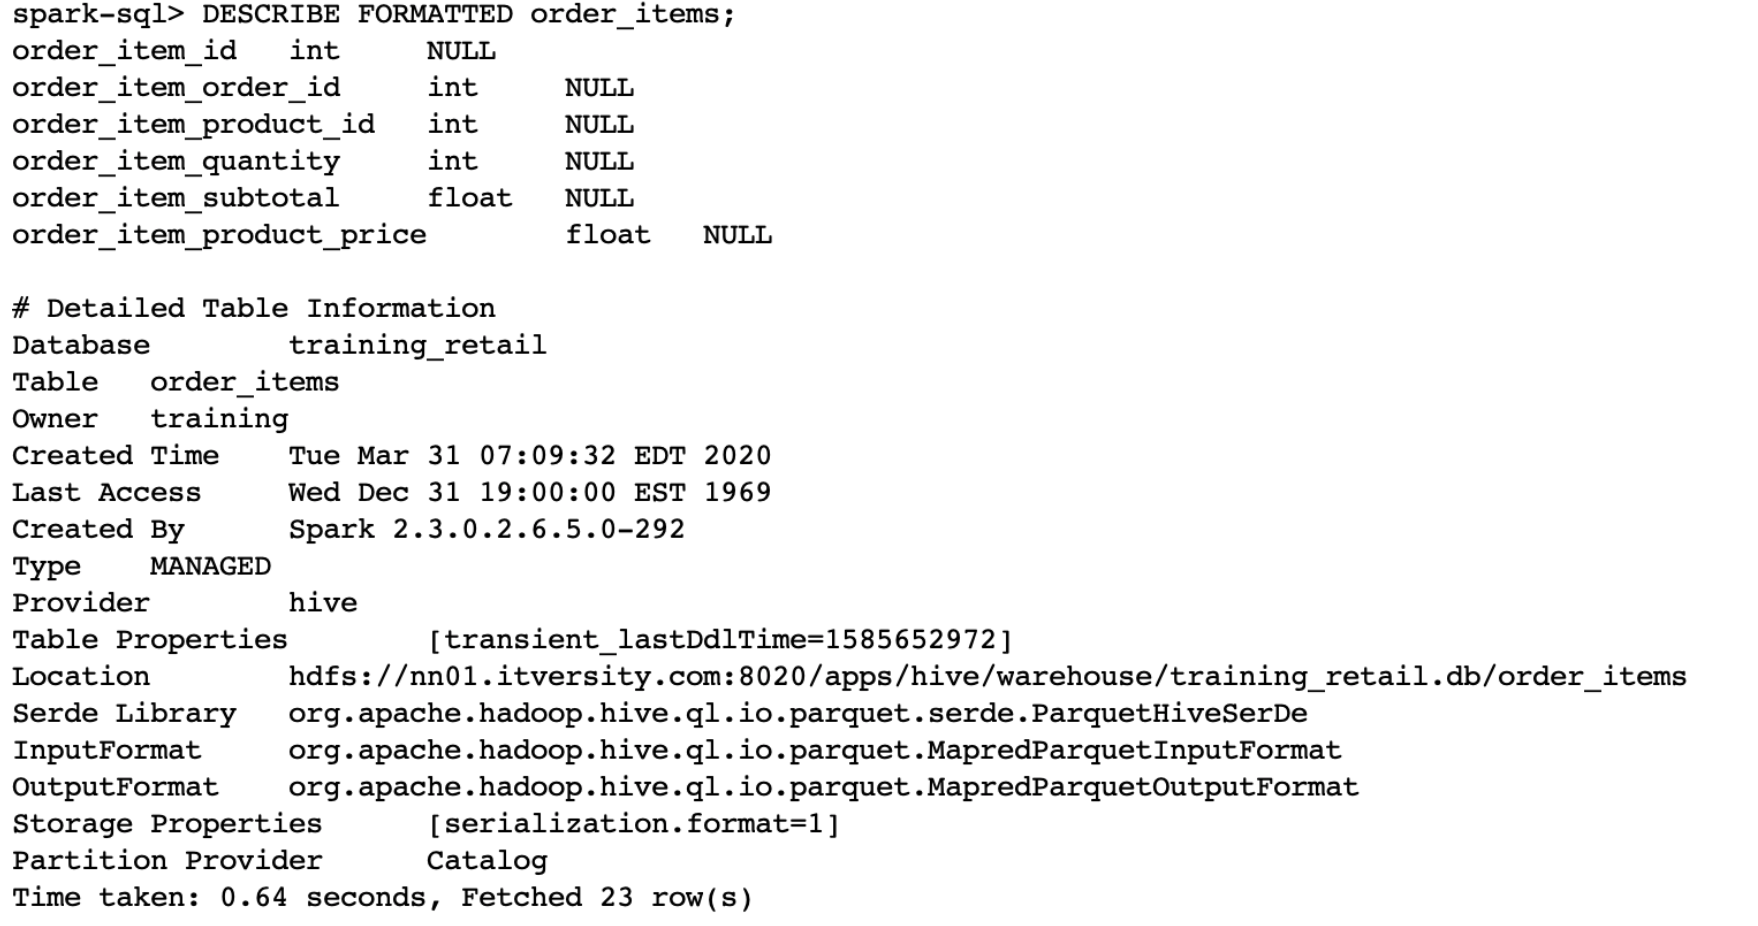

In [ ]:
%%sql

DESCRIBE FORMATTED order_items

In [ ]:
spark.sql("DESCRIBE FORMATTED order_items").show(200, false)

In [ ]:
val username = System.getProperty("user.name")

In [ ]:
import sys.process._

s"hdfs dfs -ls /user/${username}/warehouse/${username}_retail.db/order_items" !